In [51]:
import praw
import csv
import nltk

# Intializing reddit client

In [52]:
reddit = praw.Reddit(client_id = 'nz04TlX3jb7wHw', client_secret = 'nXjxefn8FSkCH04dxihWFlFdOcTFrA',
                     username = 'Trapnova',password = 'ayush@flash121',
                     user_agent = 'prawTutorial')

In [53]:
subreddit = reddit.subreddit('AskReddit')
hot_python = subreddit.top(limit = 900)

In [54]:
title = []
question = []
score = []
date = []
num_comments = []
score_ratio = []
count = 0

# Function for Implementing Unix to year

In [55]:
def unix_year(time):
  month = ((time/86400)//365)
  year = 1970 + int(month)
  return year

# Extracting information from reddit and storing it into respective List 

In [56]:
for submission in hot_python:
    
    if not submission.stickied:
        
        question.append(submission.title)
        title.append(submission.title.split())
        score.append(submission.score)
        time = submission.created
        date.append(unix_year(time))
        num_comments.append(submission.num_comments)
        score_ratio.append(submission.upvote_ratio)

# Importing and implememnting stop words from nltk corpus on title list

In [57]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
title1 = [[]]*len(title)

In [59]:
import string

In [60]:
punctuation = '!#$%&\"()*+,-./:;<=>?@[\\]^_`{|}~'

In [61]:
for i in range(len(title)):
    x = []
    for j in range(len(title[i])):
        if title[i][j] in stop_words:
            pass
        else:
            x.append(title[i][j].translate(str.maketrans("","",punctuation)))
    title1[i] = x

# Lemmatizing the words

In [62]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()



for i in range(len(title1)):
    for j in range(len(title1[i])):
        title1[i][j] = title1[i][j].replace(",","")
        title1[i][j] = wordnet_lemmatizer.lemmatize(title1[i][j],pos = 'v')



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [63]:
# Initial Version
# Until here the code is in preferred format where the title 1 and title 1 stores the individual 
# words in a sentence in the same list but after here we're storing each word as a key whereas we 
# want to store each Question/sentence as a key and each word as different value. But here we're
# going to store all the words that belong to one question as a single list. SO if there are 10000 questions
# there will be  a column called words which will have 10000 items and each item will be a list containing the
# words in the question seperated by comma

# --------------------------------------------------------------
# words = {}
#--------------------------------------------------------------

# for i in range(len(title1)):
#     for j in range(len(title1[i])):
#         curr_word = title1[i][j]
#         # print(words.keys())
#         if curr_word in words.keys():
#             words[curr_word][4] += 1
#             words[curr_word][0] = words[curr_word][0]+score[i]
#             words[curr_word][1] = words[curr_word][1]+date[i]
#             words[curr_word][2] = words[curr_word][2]+num_comments[i]
#             words[curr_word][3] = words[curr_word][3]+score_ratio[i]
#         else:
#             words[curr_word] = [score[i],date[i],num_comments[i],score_ratio[i],1]

#--------------------------------------------------------

# Averaging each value in the dictionary based on the number of times it appears
# Divide each value by it's count also check first if the 4 index of the dictionary has > 1 value.

#--------------------------------------------------------

# for i in words.keys():
#     if words[i][4]>1:
#         words[i][0] = words[i][0]/words[i][4]
#         words[i][1] = words[i][1]/words[i][4]
#         words[i][2] = words[i][2]/words[i][4]
#         words[i][3] = words[i][3]/words[i][4]

#--------------------------------------------------------

# Writing list into csv file.

#--------------------------------------------------------

# with open("data.csv","w",newline = "") as file:

#     writer = csv.writer(file)
#     writer.writerow(["Title","Score","Date","Num_comments","Score_ratio","Count"])
    
#     for i in words.keys():
#             writer.writerow([i,words[i][0],words[i][1],words[i][2],words[i][3],words[i][4]])

# DICTIONARY

In [64]:
words1 = {}

In [65]:
for i in range(len(title)):
    words1[question[i]] = [title1[i],score[i],date[i],num_comments[i],score_ratio[i]]

In [66]:
# Writing to CSV FIle
# Tis IS REDUNDANT


# with open("data.csv","w",newline = "") as file:

#     writer = csv.writer(file)
#     writer.writerow(["Question","Title","Score","Date","Num_comments","Score_ratio","Count"])
    
#     for i in words1.keys():
#             writer.writerow([i,words1[i][0],words1[i][1],words1[i][2],words1[i][3],words1[i][4]])


# The below line is for using Dictionary to Csv file and then using it in Fit_transform
# values = [[i] for i in reddit_data["Title"]]
# [['People'], ['pooped'], ['pooped']]

# Pandas

In [67]:
import pandas as pd

# reddit_data = pd.read_csv('/home/jovyan/work/data.csv')


# Storing classes for MLB

In [68]:
# Below Line is used using Pandas to Dictionary:
# So Words is converted to pandas dataframe and then fit_transform is applied.

In [69]:
labels = []
for i in title1:
    for j in i:
        if j in labels:
            pass
        else:
            labels.append(j)

In [70]:
len(labels)

2711

# Storing Dictionary as Dataframe

In [71]:
xyz = pd.DataFrame.from_dict(words1,orient="index",columns=["Title","Score","Date","Num_comments","Score_ratio"])

In [72]:
# MultiLabelBinarizer
# txt = [['book', 'read'],['cup', 'drink']]
# mlb = MultiLabelBinarizer(classes=("drink","cup","book", "read"))
# mlb.fit_transform(txt)
# array([[0, 0, 1, 1],
#        [1, 1, 0, 0]])

# Multi-Label Binarizer

In [73]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes = labels)

In [74]:
ft = mlb.fit_transform(xyz["Title"])

In [75]:
column = pd.DataFrame(ft,columns=labels)
column.index = xyz.index
xyz = pd.concat([xyz,column],axis=1)

# Use sci kit learn


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [77]:

X = xyz.iloc[:,5:]


In [78]:
X = X.reset_index(drop= True)

In [79]:
Y =  pd.DataFrame(xyz.iloc[:,1])

# remove row index labels

Y = Y.reset_index(drop=True)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [81]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((716, 2711), (179, 2711), (716, 1), (179, 1))

In [82]:
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
pred = linear.predict(X_test)

In [89]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

In [90]:
X_test.shape[0]

179

In [92]:
x_axiss = np.arange(X_test.shape[0]).reshape(-1,1)

In [104]:
X_test,y_test

(     People  pooped  2019  yet  still  hold  last  years  shit  Would  ...  \
 133       0       0     0    0      0     0     0      0     0      0  ...   
 136       0       0     0    0      0     0     0      0     0      1  ...   
 741       0       0     0    0      0     0     0      0     0      0  ...   
 705       0       0     0    0      0     0     0      0     0      0  ...   
 67        0       0     0    0      0     0     0      1     0      0  ...   
 ..      ...     ...   ...  ...    ...   ...   ...    ...   ...    ...  ...   
 329       0       0     0    0      0     0     0      0     0      0  ...   
 153       1       0     0    0      0     0     0      0     0      0  ...   
 734       0       0     0    0      0     0     0      0     0      0  ...   
 180       0       0     0    0      0     0     0      0     0      0  ...   
 672       0       0     0    0      0     0     0      0     0      0  ...   
 
      sensation  painful  hr  MonThurs  MonFri  Go

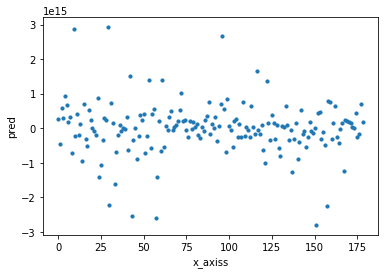

In [95]:
plt.scatter(x_axiss,pred,s=10)
plt.xlabel('x_axiss')
plt.ylabel('pred')
plt.show()

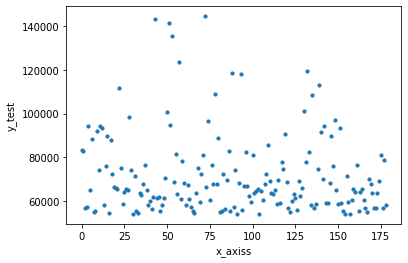

In [100]:
plt.scatter(x_axiss,y_test,s=10)
plt.xlabel('x_axiss')
plt.ylabel('y_test')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(X_test.shape,"\n",y_test.shape)

In [ ]:
y_test.plot()